# Seaborn tutorial

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
np.random.seed(sum(map(ord, "distributions")))

### Univariate distributions, histograms

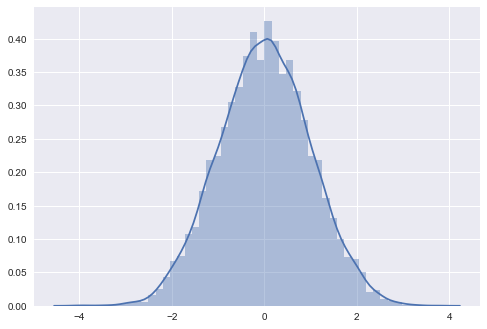

In [5]:
x = np.random.normal(size=10000)
sns.distplot(x);

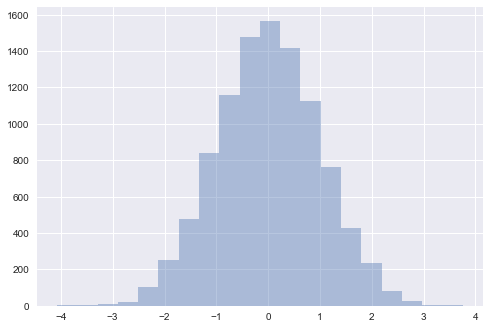

In [9]:
sns.distplot(x, bins=20, kde=False)

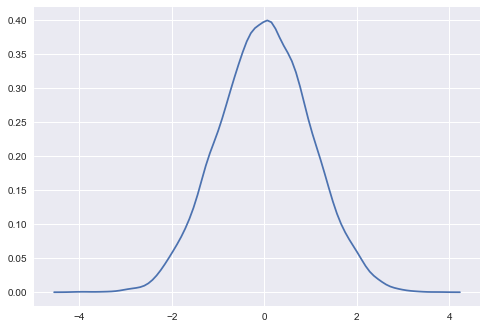

In [10]:
sns.distplot(x, hist=False)

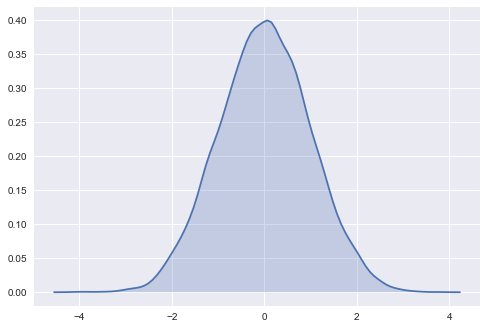

In [11]:
sns.kdeplot(x, shade=True)

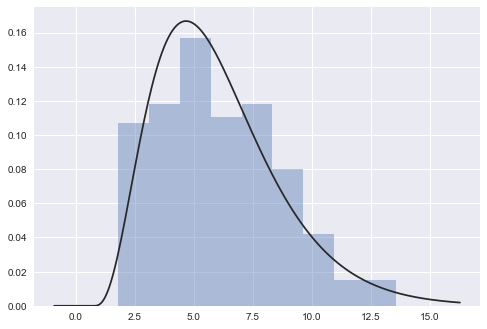

In [12]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

### Bivariate

In [13]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

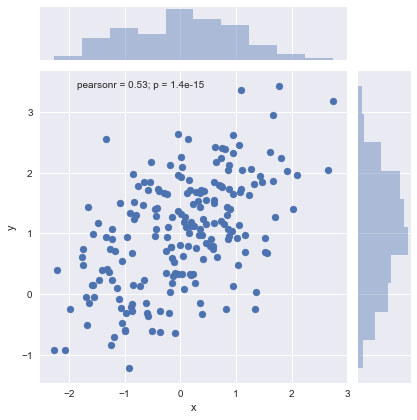

In [14]:
sns.jointplot(x="x", y="y", data=df);

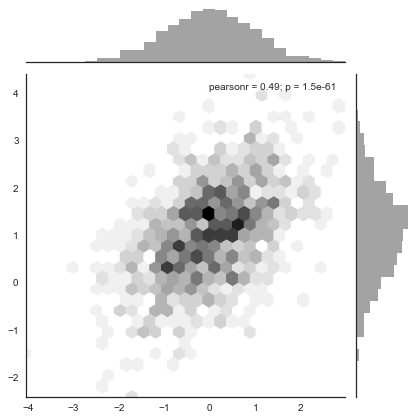

In [15]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

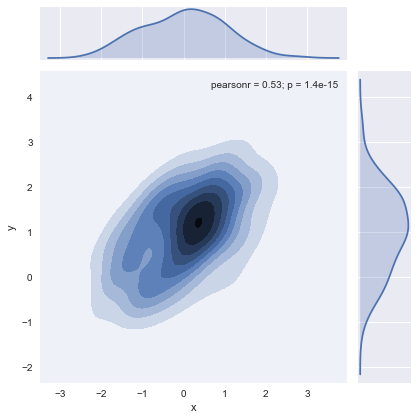

In [16]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

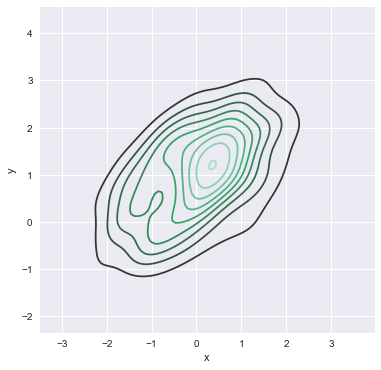

In [18]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)

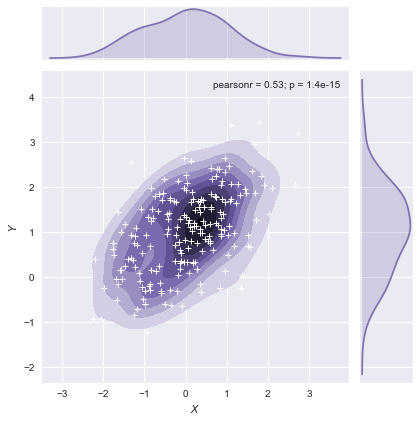

In [19]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

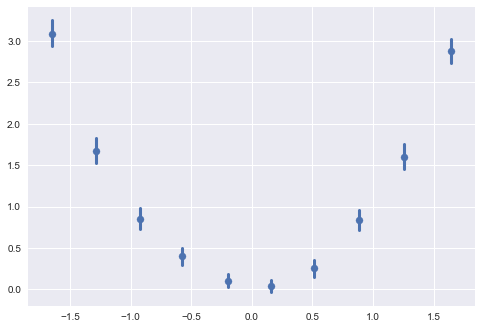

In [20]:
# just some random numbers to get startet
x = np.random.uniform(-2, 2, 10000)
y = np.random.normal(x**2, np.abs(x) + 1)

sns.regplot(x=x, y=y, x_bins=10, fit_reg=None)

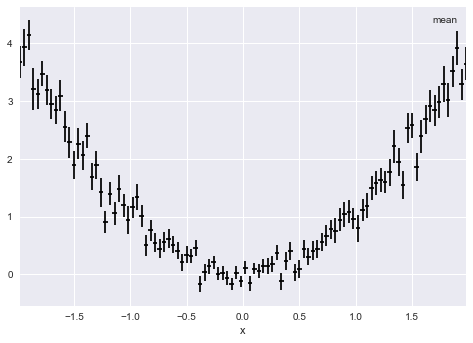

In [21]:

# just some random numbers to get startet
x = np.random.uniform(-2, 2, 10000)
y = np.random.normal(x**2, np.abs(x) + 1)
df = pd.DataFrame({'x': x, 'y': y})


# calculate in which bin row belongs base on `x`
# bins needs the bin edges, so this will give as 100 equally sized bins
bins = np.linspace(-2, 2, 101)
df['bin'] = np.digitize(x, bins=bins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]

# grouby bin, so we can calculate stuff
binned = df.groupby('bin')
# calculate mean and standard error of the mean for y in each bin
result = binned['y'].agg(['mean', 'sem'])
result['x'] = bin_centers
result['xerr'] = bin_width / 2

# plot it

result.plot(
    x='x',
    y='mean',
    xerr='xerr',
    yerr='sem',
    linestyle='none',
    capsize=0,
    color='black',
)
plt.savefig('result.png', dpi=300)

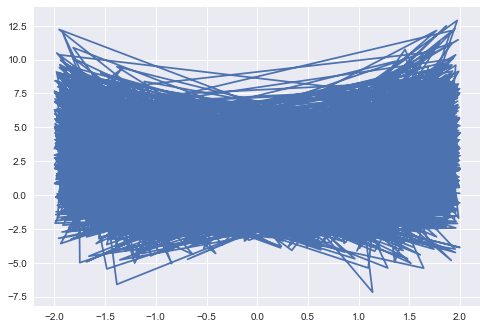

In [24]:
x = np.random.uniform(-2, 2, 10000)
y = np.random.normal(x**2, np.abs(x) + 1)
plt.plot(x,y)

In [28]:
x = np.random.uniform(-2, 2, 10000)
y = np.random.normal(x**2, np.abs(x) + 1)

<Container object of 3 artists>

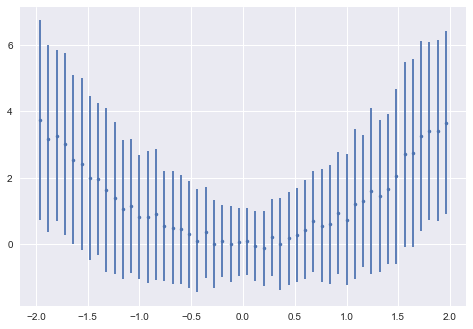

In [29]:
means_result = stats.binned_statistic(x, [y, y**2], bins=50, range=(-2,2), statistic='mean')
means, means2 = means_result.statistic
standard_deviations = np.sqrt(means2 - means**2)
bin_edges = means_result.bin_edges
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, linestyle='none', marker='.')

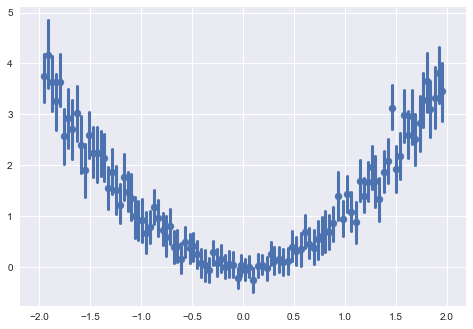

In [27]:
x = np.random.uniform(-2, 2, 10000)
y = np.random.normal(x**2, np.abs(x) + 1)
sns.regplot(x=x, y=y, x_bins=100, fit_reg=None)